 Load the Data

In [1]:
import pandas as pd

# File paths
data_file = 'network_dataset.csv'
labeled_data_file = 'network_dataset_labeled.csv'

# Load the datasets
network_data = pd.read_csv(data_file)
labeled_data = pd.read_csv(labeled_data_file)

# Display dataset information
print("Network Data Info:")
print(network_data.info())
print(network_data.describe())

print("\nLabeled Data Info:")
print(labeled_data.info())
print(labeled_data.describe())

Network Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   timestamp                   1001 non-null   object 
 1   bandwidth                   1001 non-null   int64  
 2   throughput                  1001 non-null   float64
 3   congestion                  1001 non-null   float64
 4   packet_loss                 1001 non-null   float64
 5   latency                     1001 non-null   float64
 6   jitter                      1001 non-null   float64
 7   Routers                     1001 non-null   object 
 8   Planned route               1001 non-null   object 
 9   Network measure             1001 non-null   object 
 10  Network target              1001 non-null   object 
 11  Video target                701 non-null    object 
 12  Percentage video occupancy  1001 non-null   int64  
 13  Bitrate video 

Visualize Distributions

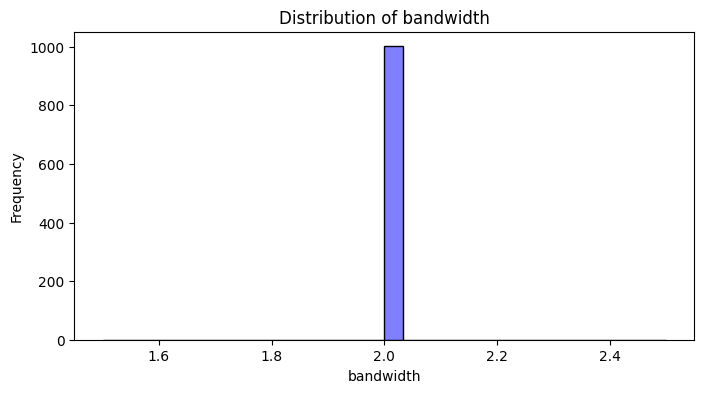

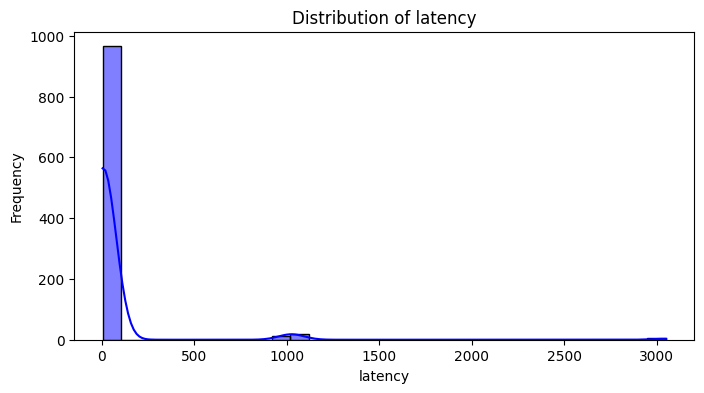

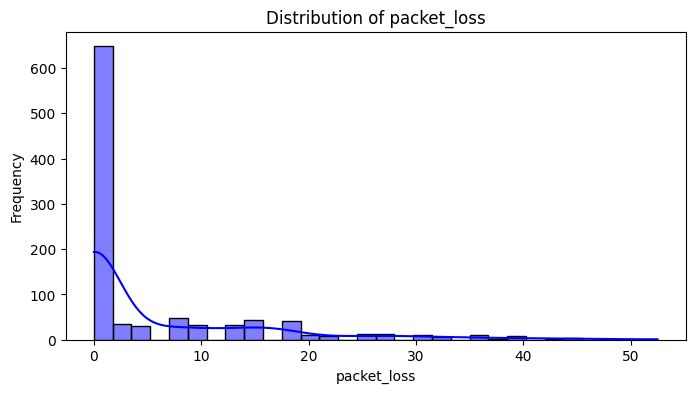

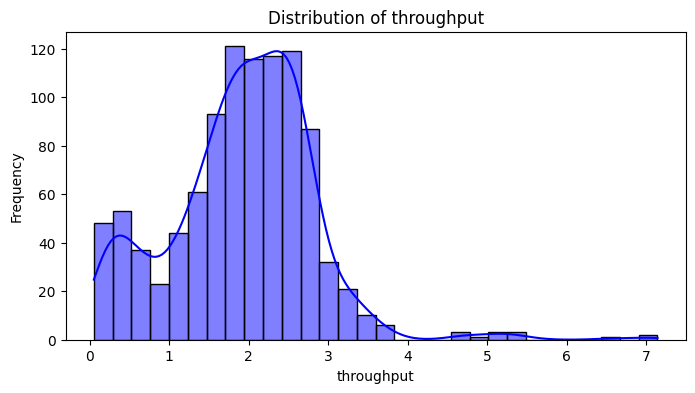

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of key columns
key_columns = ['bandwidth', 'latency', 'packet_loss', 'throughput']  # Replace with actual column names
for col in key_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(network_data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Correlation Heatmap

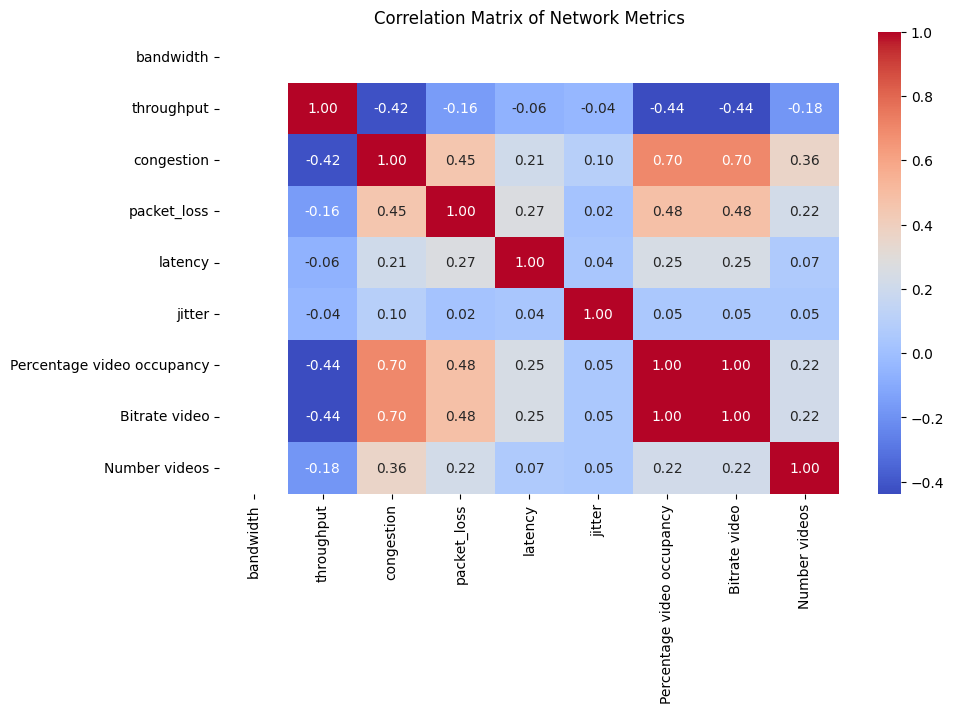

In [5]:
# Select only numeric columns for correlation
numeric_columns = network_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = network_data[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Network Metrics')
plt.show()

Time-Series Trends

In [7]:
# Display column names to verify
print("Columns in dataset:", network_data.columns)

Columns in dataset: Index(['timestamp', 'bandwidth', 'throughput', 'congestion', 'packet_loss',
       'latency', 'jitter', 'Routers', 'Planned route', 'Network measure',
       'Network target', 'Video target', 'Percentage video occupancy',
       'Bitrate video', 'Number videos'],
      dtype='object')


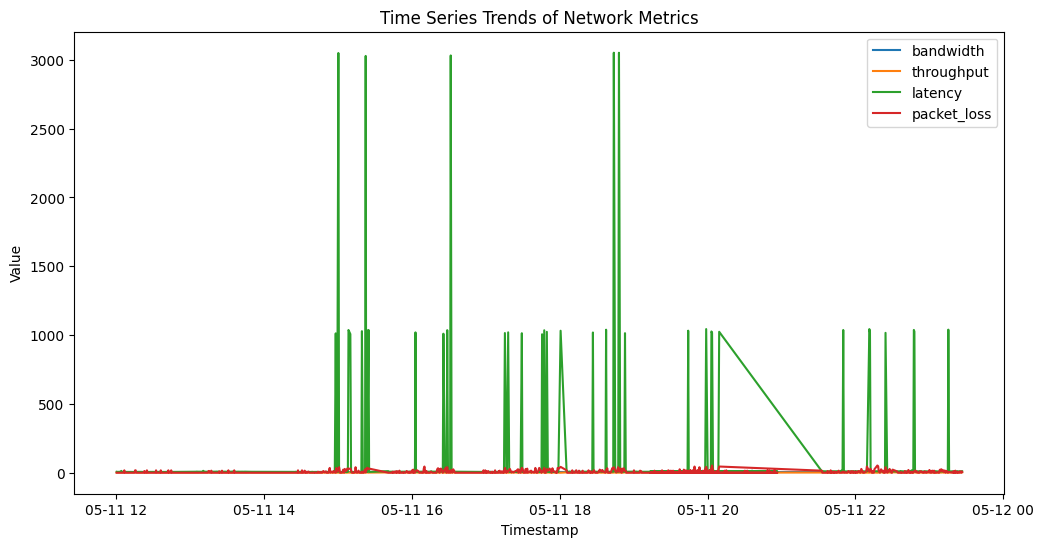

In [8]:
# Define the correct time column
time_column = 'timestamp'

# Convert 'timestamp' to datetime for proper handling (if not already converted)
network_data[time_column] = pd.to_datetime(network_data[time_column])

# Plot time-series trends for key numeric metrics
key_columns = ['bandwidth', 'throughput', 'latency', 'packet_loss']  # Adjust as needed

plt.figure(figsize=(12, 6))
for col in key_columns:
    plt.plot(network_data[time_column], network_data[col], label=col)

plt.title('Time Series Trends of Network Metrics')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

Standardize Data

In [9]:
from sklearn.preprocessing import StandardScaler

# Data preprocessing for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(network_data[key_columns])

K-means Clustering

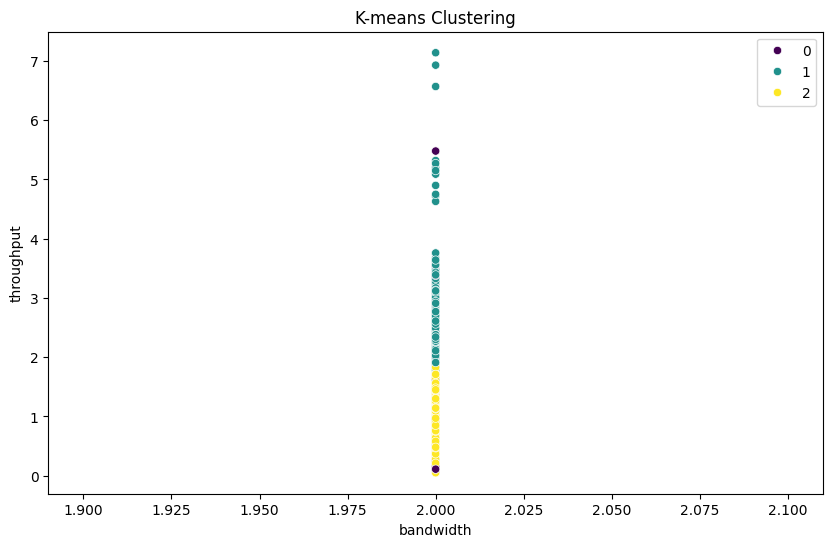

In [10]:
from sklearn.cluster import KMeans

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
network_data['KMeans_Cluster'] = kmeans_labels

# Visualizing K-means clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=network_data[key_columns[0]], y=network_data[key_columns[1]], hue=kmeans_labels, palette='viridis')
plt.title('K-means Clustering')
plt.xlabel(key_columns[0])
plt.ylabel(key_columns[1])
plt.show()

DBSCAN Clustering

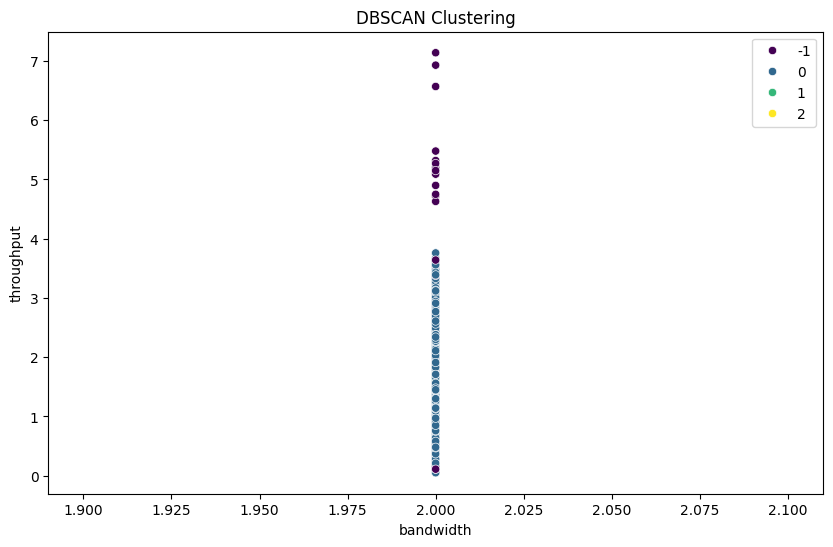

In [11]:
from sklearn.cluster import DBSCAN

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)
network_data['DBSCAN_Cluster'] = dbscan_labels

# Visualizing DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=network_data[key_columns[0]], y=network_data[key_columns[1]], hue=dbscan_labels, palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel(key_columns[0])
plt.ylabel(key_columns[1])
plt.show()

Isolation Forest for Anomaly Detection

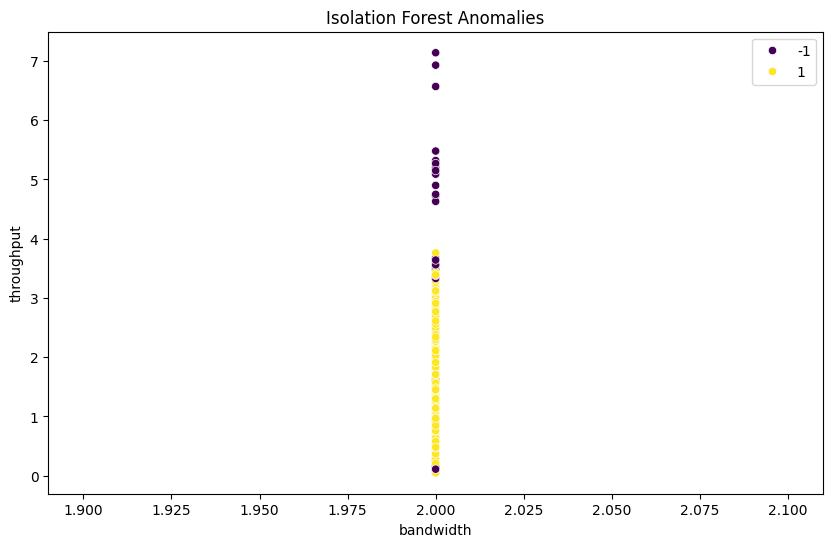

In [12]:
from sklearn.ensemble import IsolationForest

# Isolation Forest for anomaly detection
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
isolation_labels = isolation_forest.fit_predict(scaled_data)
network_data['Isolation_Anomaly'] = isolation_labels

# Visualizing anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(x=network_data[key_columns[0]], y=network_data[key_columns[1]], hue=isolation_labels, palette='viridis')
plt.title('Isolation Forest Anomalies')
plt.xlabel(key_columns[0])
plt.ylabel(key_columns[1])
plt.show()